In [1]:
from logger import Logger

from collections import Counter
from datetime import datetime
from dateutil import parser
import json

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [2]:
logger = Logger(show = True, html_output = True, config_file = "config.txt")

2019.03.25-20:38:55 Initialize the logger
2019.03.25-20:38:55 Create logs folder logs
2019.03.25-20:38:55 Create log file logs\2019-03-25_20_38_55_log0.html
2019.03.25-20:38:55 Create models folder models
2019.03.25-20:38:55 Create output folder output
2019.03.25-20:38:55 Create data folder data
2019.03.25-20:38:55 Read config file config.txt


In [3]:
logger.log("Start loading data ...")
data = []
with open(logger.get_data_file('instances.jsonl'), "r", encoding="utf8") as fp:
    for line in fp:
        data.append(json.loads(line))

[2019.03.25-20:38:55] Start loading data ...


In [4]:
targets = []
with open(logger.get_data_file('truth.jsonl'), "r", encoding="utf8") as fp:
    for line in fp:
        targets.append(json.loads(line))

dataset = list(zip(data, targets))

In [5]:
dataset = []
for element, target in zip(data, targets):
    dataset.append(element)
    dataset[-1]['clickBaitScore'] = target['truthMean']
logger.log("Finish loading {} entries".format(len(dataset)), show_time = True)

[2019.03.25-20:38:55] Finish loading 2459 entries [0.23s]


In [6]:
num_media = sum([elem['postMedia'] != [] for elem in dataset])
longest_post_size = max([len(elem['postText'][-1]) for elem in dataset])
shortest_post_size = min([len(elem['postText'][-1]) for elem in dataset])
longest_paragraph_size =  max([len(elem['targetParagraphs']) for elem in dataset])
shortest_paragraph_size = min([len(elem['targetParagraphs']) for elem in dataset])
longest_keywords_size = max([len(elem['targetKeywords'].split(',')) for elem in dataset])
shortest_keywords_size = min([len(elem['targetKeywords'].split(',')) for elem in dataset])

click_bait_scores = [elem['clickBaitScore'] for elem in dataset]
occurences = dict(Counter(click_bait_scores)).items()
occurences = sorted(occurences, key=lambda tup: tup[1], reverse = True)

logger.log("Posts containing images: {}".format(num_media))
logger.log("Longest post by characters {}".format(longest_post_size))
logger.log("Shortest post by characters {}".format(shortest_post_size))
logger.log("Longest article by paragraphs {}".format(longest_paragraph_size))
logger.log("Shortest article by paragraphs {}".format(shortest_paragraph_size))
logger.log("Longest article by keywords {}".format(longest_keywords_size))
logger.log("Shortest article by keywords {}".format(shortest_keywords_size))
logger.log("Maximum clickbait score is {} for {} posts".format(occurences[0][0], occurences[0][1]))
logger.log("Minimum clickbait score is {} for {} posts".format(occurences[-1][0], occurences[-1][1]))

[2019.03.25-20:38:56] Posts containing images: 1623
[2019.03.25-20:38:56] Longest post by characters 143
[2019.03.25-20:38:56] Shortest post by characters 11
[2019.03.25-20:38:56] Longest article by paragraphs 175
[2019.03.25-20:38:56] Shortest article by paragraphs 0
[2019.03.25-20:38:56] Longest article by keywords 76
[2019.03.25-20:38:56] Shortest article by keywords 1
[2019.03.25-20:38:56] Maximum clickbait score is 0.26666668 for 261 posts
[2019.03.25-20:38:56] Minimum clickbait score is 1.0 for 13 posts


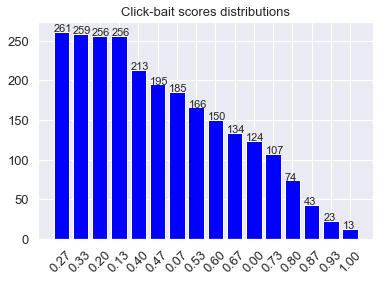

In [7]:
sns.set()

x = np.array(range(len(occurences)))
y = [item[1] for item in occurences]

plt.bar(x, y, color = 'blue')

my_xticks = ["{:.2f}".format(item[0]) for item in occurences]
plt.xticks(x, my_xticks, rotation = 45, fontsize = 13)
plt.yticks(fontsize = 13)
plt.title("Click-bait scores distributions", fontsize = 13)

for pos_x, pos_y in zip(x, y):
    plt.text(pos_x - 0.4, pos_y + 0.5, str(pos_y), fontsize = 11)

plt.show()

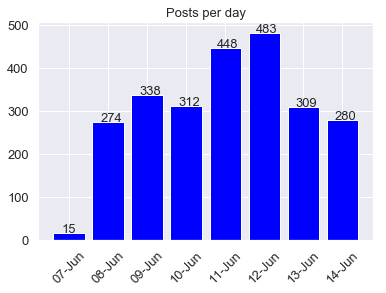

In [8]:
times = [' '.join(elem['postTimestamp'].split(' ')[:-2]) for elem in dataset]
times.sort(key=lambda date: datetime.strptime(date, "%a %b %d %H:%M:%S"))

df = pd.DataFrame([0 for _ in range(len(times))], columns = ['score'], index = [parser.parse(elem) for elem in times])
df = df.resample('D').apply({'score':'count'})
df.index = df.index.map(lambda idx: idx.strftime('%d-%b'))

posts_per_day = list(zip(df.index.values, df.score))

x = np.array(range(len(posts_per_day)))
y = [item[1] for item in posts_per_day]

plt.bar(x, y, color = 'blue')
my_xticks = [item[0] for item in posts_per_day]
plt.xticks(x, my_xticks, rotation = 45, fontsize = 13)
plt.yticks(fontsize = 13)
plt.title("Posts per day", fontsize = 13)

for pos_x, pos_y in zip(x, y):
    plt.text(pos_x - 0.2, pos_y + 1, str(pos_y), fontsize = 13)

plt.show()

In [9]:
logger.close()